In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import keras
from keras import backend as K
K.clear_session()
%matplotlib inline

# Import MNIST
Import, normalize and visualize the data
- Import from keras
- Normalize with numpy
- Visualize with pyplot

In [13]:
# Import the MNIST dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
# Check the amount of data we have
print x_train.shape, y_train.shape
print x_test.shape, y_test.shape

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [15]:
# Normalize the MNIST data
x_train = x_train/255.
x_test = x_test/255.

# Reshape the data
x_train = x_train.reshape( x_train.shape+(1,) )
x_test = x_test.reshape( x_test.shape+(1,) )

# Change the one-hot-encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [16]:
# Check the amount of data we have (again)
print x_train.shape, y_train.shape
print x_test.shape, y_test.shape

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


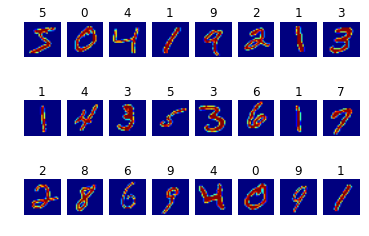

In [17]:
# Check the data we have
fig,axs = plt.subplots(3,8)
axs = [a for b in axs for a in b]
for idx in range(len(axs)):
    axs[idx].imshow(x_train[idx,:,:,0])
    axs[idx].set_title(y_train[idx].argmax())
    axs[idx].axis('off')
plt.show()

# Build and train a Keras model
Create and compile and optimize the model.
- Create the computational graph
- Compile with desireds optimizer
- Run the optimization on our dataset

In [18]:
# Training Parameters
batch_size = 128
num_classes = 10
epochs = 5

In [19]:
# Define the model
img_input = keras.layers.Input(shape=(28, 28, 1))
x = keras.layers.Convolution2D(32, (3, 3), padding='same', activation='relu')(img_input)
x = keras.layers.MaxPooling2D(pool_size=[2,2])(x)
x = keras.layers.Convolution2D(32, (3, 3), padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=[2,2])(x)
x = keras.layers.Convolution2D(32, (3, 3), padding='same', activation='relu')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.models.Model(img_input, x, name='model_perso')

In [20]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(),
              metrics=['accuracy'])

In [21]:
# Train the model
tensorboard = keras.callbacks.TensorBoard(log_dir='./', histogram_freq=1)
training = model.fit(x_train, y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     validation_data=(x_test, y_test),
                     callbacks=[tensorboard,],
                     )

Train on 60000 samples, validate on 10000 samples
INFO:tensorflow:Summary name conv2d_1/kernel:0 is illegal; using conv2d_1/kernel_0 instead.
INFO:tensorflow:Summary name conv2d_1/bias:0 is illegal; using conv2d_1/bias_0 instead.
INFO:tensorflow:Summary name conv2d_2/kernel:0 is illegal; using conv2d_2/kernel_0 instead.
INFO:tensorflow:Summary name conv2d_2/bias:0 is illegal; using conv2d_2/bias_0 instead.
INFO:tensorflow:Summary name conv2d_3/kernel:0 is illegal; using conv2d_3/kernel_0 instead.
INFO:tensorflow:Summary name conv2d_3/bias:0 is illegal; using conv2d_3/bias_0 instead.
INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.
INFO:tensorflow:Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.
Epoch 1/5
60000/60000 [==============================] - 124s - loss: 0.1884 - acc: 0.9427 - val_loss: 0.0589 - val_acc: 0.9801
Epoch 2/5
60000/60000 [==============================] - 126s - loss: 0.0504 - acc: 0.9841 - val_loss: 0.0

#  Test the result
Is it working ?

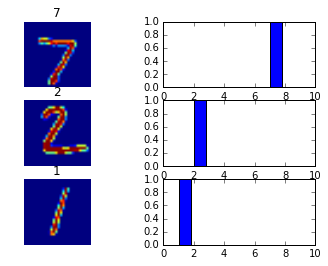

predicted [7 2 1]
with proba [ 1.          0.99999738  0.99999547]


In [22]:
# Show some results
n_test_imgs = 3
fig,axs = plt.subplots(n_test_imgs,2)
preds = model.predict(x_test[:n_test_imgs])

for idx in range(n_test_imgs):
    axs[idx][0].imshow(x_test[idx,:,:,0])
    axs[idx][0].set_title(y_test[idx].argmax())
    axs[idx][0].axis('off')
    axs[idx][1].bar(range(10), preds[idx])
plt.show()

print "predicted", preds.argmax(axis=1) 
print "with proba", preds.max(axis=1)
